In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Intake ##

In [2]:
data = pd.read_csv('/Users/rowlandhill/Documents/Personal/Kaggle_Comps/Global_Terrorism_Data/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')

/Users/rowlandhill/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Prelim EDA + Data Cleaning ###

In [4]:
data.shape

(181691, 135)

In [5]:
### Explore ID column ###
print('The DF has shape ', data.shape)
print('The eventid column has ', data['eventid'].nunique(), 'unique values')

The DF has shape  (181691, 135)
The eventid column has  181691 unique values


In [6]:
data.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region

In [7]:
### Explore NaN significance ###

NaN_summary = pd.DataFrame(data.isnull().sum(axis = 0))

NaN_summary['pct_NaN'] = round((NaN_summary[0] / data.shape[0]),2)

In [8]:
pd.set_option('display.max_rows', NaN_summary.shape[0] + 1)

In [9]:
NaN_summary

,0,pct_NaN
eventid,0,0.00
iyear,0,0.00
imonth,0,0.00
iday,0,0.00
approxdate,172452,0.95
extended,0,0.00
resolution,179471,0.99
country,0,0.00
country_txt,0,0.00
region,0,0.00


In [10]:
### Segment DF for column drop based on % NaN ###

drp_bkt = []

for i in NaN_summary['pct_NaN']:
    if i >= 0.9:
        drp_bkt.append('Yes')
    elif i >= 0.75:
        drp_bkt.append('Probably')
    elif i >= 0.5:
        drp_bkt.append('Judgement')
    else:
        drp_bkt.append('No')
        
NaN_summary['Drop_Rec'] = drp_bkt

In [11]:
NaN_summary

,0,pct_NaN,Drop_Rec
eventid,0,0.00,No
iyear,0,0.00,No
imonth,0,0.00,No
iday,0,0.00,No
approxdate,172452,0.95,Yes
extended,0,0.00,No
resolution,179471,0.99,Yes
country,0,0.00,No
country_txt,0,0.00,No
region,0,0.00,No


In [12]:
### get lists of columns to drop ###

yes_drop = NaN_summary.loc[(NaN_summary.Drop_Rec == 'Yes')]
yes_drop = yes_drop.index.tolist()

prob_drop = NaN_summary.loc[(NaN_summary.Drop_Rec == 'Probably')]
prob_drop = prob_drop.index.tolist()

judge_drop = NaN_summary.loc[(NaN_summary.Drop_Rec == 'Judgement')]
judge_drop = judge_drop.index.tolist()

### Examine how many would be lost at each drop point ###
print("Yes drop loses ", round((len(yes_drop) / data.shape[1]),2), "pct.")
print("Probably drop loses another ", round((len(prob_drop) / data.shape[1]),2), "pct.")
print("Judgement drop loses another ", round((len(judge_drop) / data.shape[1]),2), "pct.")

Yes drop loses  0.46 pct.
Probably drop loses another  0.06 pct.
Judgement drop loses another  0.05 pct.


In [13]:
### Drop columns with large amounts (>90%) of missing data ###

data2 = data.drop(yes_drop, axis = 1)

In [14]:
data2.shape

(181691, 73)

In [15]:
### Examine data types of marginal drop variables -- if numeric will consider median impute ###

prob_drop, judge_drop

(['alternative',
  'alternative_txt',
  'claimmode',
  'claimmode_txt',
  'propvalue',
  'addnotes',
  'scite3',
  'related'],
 ['location',
  'motive',
  'propextent',
  'propextent_txt',
  'propcomment',
  'ransom',
  'scite2'])

In [16]:
### combine the marginal drop columns to explore the datatypes of remaining high-NaN variables ###

drop_combo = prob_drop + judge_drop

type_chk = data2.loc[:, drop_combo]

In [17]:
type_chk.shape

(181691, 15)

In [18]:
type_chk.dtypes

alternative        float64
alternative_txt     object
claimmode          float64
claimmode_txt       object
propvalue          float64
addnotes            object
scite3              object
related             object
location            object
motive              object
propextent         float64
propextent_txt      object
propcomment         object
ransom             float64
scite2              object
dtype: object

In [19]:
### Suspect some of these float64s are just encoders ###

print(data2.claimmode.min())
print(data2.claimmode.max())

1.0
10.0


In [31]:
### impute float64 variables with median where logical ### 

data2['propvalue'].fillna((data2['propvalue'].median()), inplace = True)
data2['nperps'].fillna((data2['nperps'].median()), inplace = True)
data2['nkill'].fillna((data2['nkill'].median()), inplace = True)
data2['nkillus'].fillna((data2['nkillus'].median()), inplace = True)
data2['nkillter'].fillna((data2['nkillter'].median()), inplace = True)
data2['nwound'].fillna((data2['nwound'].median()), inplace = True)
data2['nwoundus'].fillna((data2['nwoundus'].median()), inplace = True)
data2['nwoundte'].fillna((data2['nwoundte'].median()), inplace = True)

In [30]:
print(data2.propvalue.isnull().sum())
print(data2.nperps.isnull().sum())

0
0


In [22]:
### Check all data for NaN impute options ###

data2_nulls = data2.isnull().sum()
data2_types = data2.dtypes
d = {'type':data2_types, 'nulls':data2_nulls}
checkDF = pd.DataFrame(data = d)
checkDF

,type,nulls
eventid,int64,0
iyear,int64,0
imonth,int64,0
iday,int64,0
extended,int64,0
country,int64,0
country_txt,object,0
region,int64,0
region_txt,object,0
provstate,object,421


## Next Steps ##

To this point I have addressed all of the columns that are significantly empty and have begun to dig into the ones that are not so empty that they are useless, but still too empty to be confidently modeled.  The next installment of code will deal with the imputation of numeric columns left in the data2 DF.  This will require pre-work to understand what each column really means as I suspect some of the "numeric" columns are actually just encoders. 

In [23]:
data2.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [24]:
data2.dtypes

eventid               int64
iyear                 int64
imonth                int64
iday                  int64
extended              int64
country               int64
country_txt          object
region                int64
region_txt           object
provstate            object
city                 object
latitude            float64
longitude           float64
specificity         float64
vicinity              int64
location             object
summary              object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr           float64
alternative         float64
alternative_txt      object
multiple            float64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt      object
targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt         

In [25]:
data2.shape

(181691, 73)

In [32]:
### Drop discretionary columns that have high NAs and are likely categorical encoders ###

disc_drop = ['location', 'alternative', 'alternative_txt', 'propextent']
data2 = data.drop(disc_drop, axis = 1)

In [33]:
### replace target subtype and randome NAs with 0s ###

data2['ransom'].fillna(0, inplace = True)
data2['targsubtype1'].fillna(0, inplace = True)

## Visuals ##

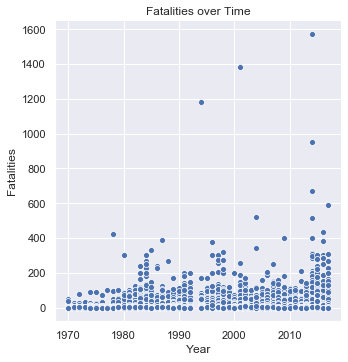

In [40]:
### Number Killed Over Time ###

plot = sns.relplot(x = 'iyear', y = 'nkill', data = data2)
plot.set(xlabel = 'Year', ylabel = 'Fatalities', title = 'Fatalities over Time')
plt.show()

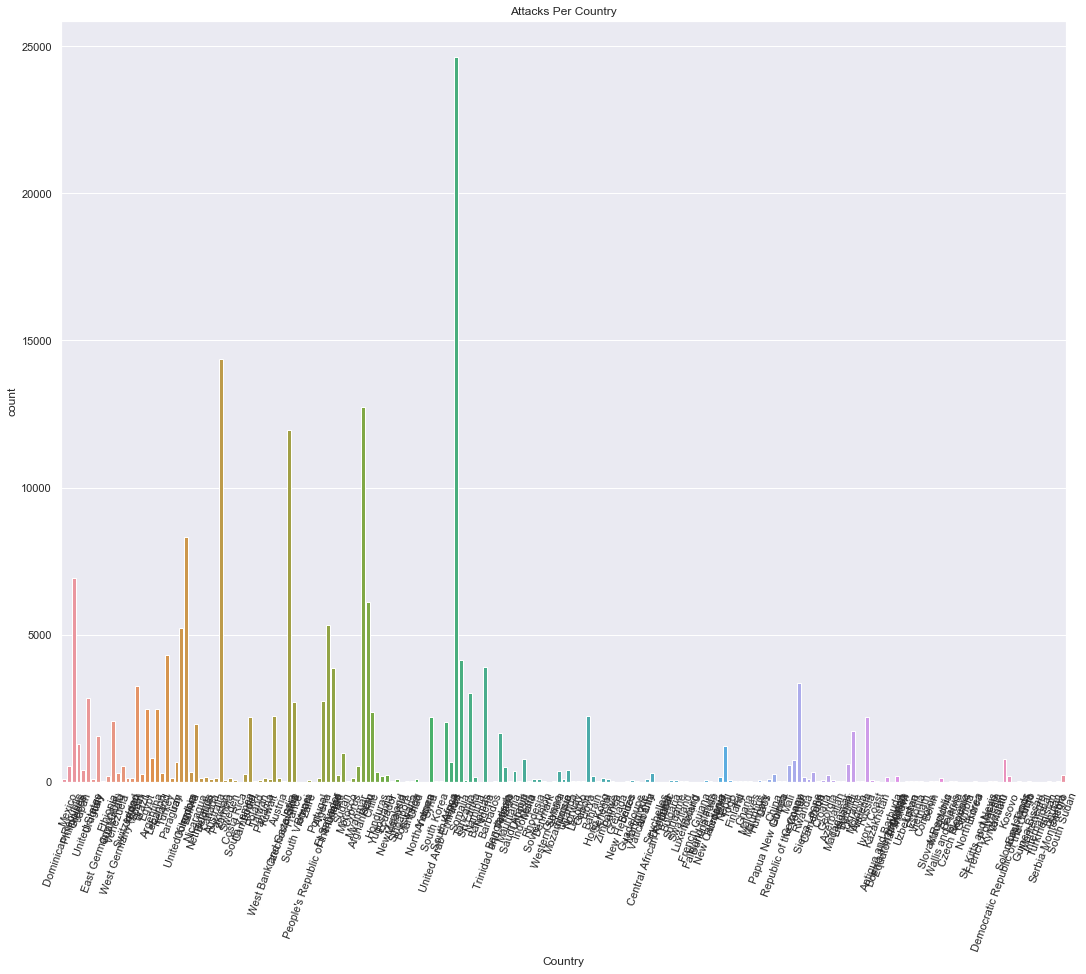

In [53]:
### Killed per Country ###

plot = sns.countplot(x = 'country_txt', data = data2)
plot.set(xlabel = 'Country', title = 'Attacks Per Country')
sns.set(rc = {'figure.figsize':(24, 18)})
plt.xticks(rotation = 70)
plt.show()

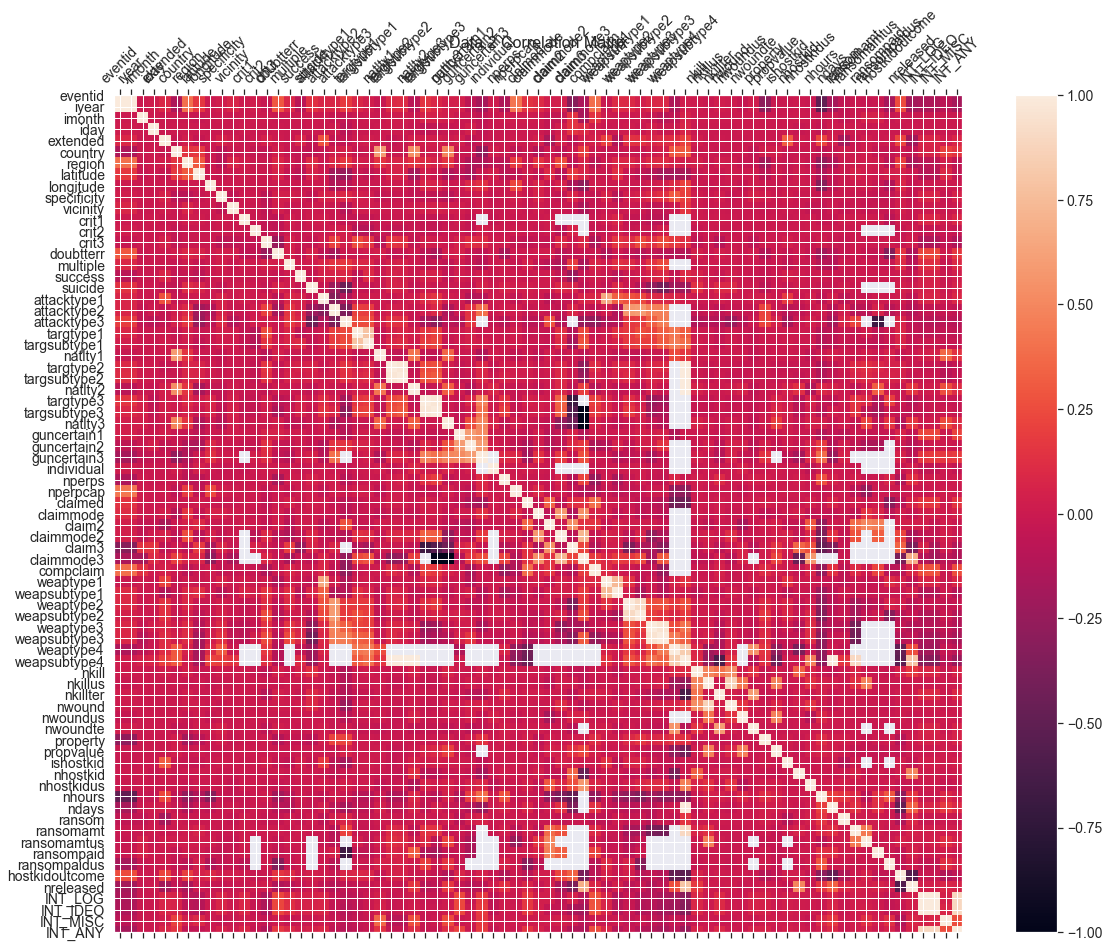

In [55]:
### Corrplot ###

num_df = data2.select_dtypes(include = ['number'])

plot = plt.figure(figsize = (19, 15))
plt.matshow(num_df.corr(), fignum = plot.number)
plt.xticks(range(num_df.shape[1]), num_df.columns, fontsize = 14, rotation = 45)
plt.yticks(range(num_df.shape[1]), num_df.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Data 2 Correlation Matrix', fontsize = 16)
plt.show()